In [1]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import gmaps
import statsmodels.api as sm

In [2]:
post_secondary_csv = pd.read_csv("post_sec_data_clean.csv")
post_secondary_df = pd.DataFrame(post_secondary_csv)

home_ownership_csv = pd.read_csv("Homeownership_ACS.clean")
home_ownership_df = pd.DataFrame(home_ownership_csv)

In [3]:
home_ownership_df = home_ownership_df[["County", "HOR"]]
post_secondary_df = post_secondary_df[["county","counts"]]
post_secondary_df  = post_secondary_df.rename(columns={"counts": "school_counts"})
home_ownership_df  = home_ownership_df.rename(columns={"County": "county"})

In [4]:
home_ownership_df.head()

,county,HOR
0,"Autauga, AL",73.3
1,"Baldwin, AL",72.9
2,"Barbour, AL",62.5
3,"Bibb, AL",75.4
4,"Blount, AL",78.5


In [5]:
post_secondary_df.head()

,county,school_counts
0,"Los Angeles, CA",228
1,"Cook, IL",125
2,"Maricopa, AZ",92
3,"New York, NY",91
4,"Miami-Dade, FL",88


In [6]:
sample_home_ownership = home_ownership_df.sample(n=1400)
sample_home_ownership = sample_home_ownership.reset_index(drop=True)
sample_home_ownership.head()

,county,HOR
0,"Knox, NE",73.5
1,"Izard, AR",78.7
2,"Winston, AL",77.3
3,"Newton, TX",82.8
4,"Buchanan, VA",78.9


In [7]:
post_sec_analysis = sample_home_ownership.merge(post_secondary_df, on="county")
post_sec_analysis.head()

,county,HOR,school_counts
0,"Izard, AR",78.7,1
1,"Buchanan, VA",78.9,2
2,"New Haven, CT",62.3,28
3,"Richland, OH",67.7,6
4,"Clarion, PA",69.4,2


In [8]:
len(post_sec_analysis)

629

## Analysis

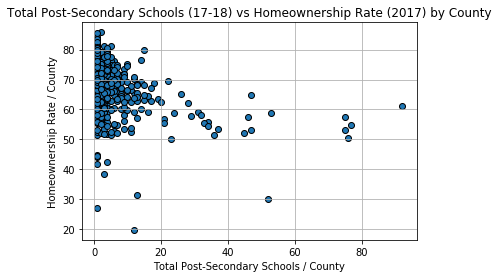

In [9]:
plt.scatter(post_sec_analysis["school_counts"], post_sec_analysis["HOR"], marker="o", edgecolor='black')
plt.title("Total Post-Secondary Schools (17-18) vs Homeownership Rate (2017) by County")
plt.ylabel("Homeownership Rate / County")
plt.xlabel("Total Post-Secondary Schools / County")
plt.grid(True)
plt.savefig('Pictures/Post_sec_scatter.png')

In [10]:
y = post_sec_analysis["HOR"]
x = post_sec_analysis["school_counts"]
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

C:\Users\johna\Anaconda3\envs\PythonData\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HOR   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     90.44
Date:                Mon, 09 Sep 2019   Prob (F-statistic):           4.01e-20
Time:                        19:50:43   Log-Likelihood:                -2171.9
No. Observations:                 629   AIC:                             4348.
Df Residuals:                     627   BIC:                             4357.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            69.8779      0.341    204.880      0.000      69.208      70.548
school_counts    -0.3057      0.032     -9.510      0.000      -0.369      -0.243
==============================================================================
Omnibus:                      188.146   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              732.449
Skew:                          -1.339   Prob(JB):                    8.93e-160
Kurtosis:                       7.558   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Set line
(slope, intercept, _, _, _) = linregress(x, y)
fit = x

ValueError: all the input array dimensions except for the concatenation axis must match exactly

NameError: name 'fit' is not defined

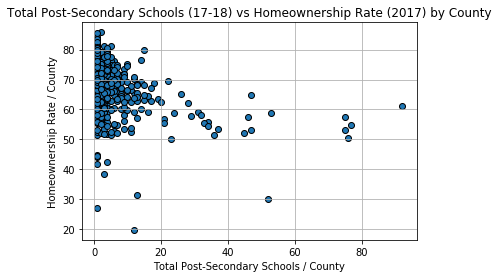

In [14]:
plt.scatter(post_sec_analysis["school_counts"], post_sec_analysis["HOR"], marker="o", edgecolor='black')
plt.title("Total Post-Secondary Schools (17-18) vs Homeownership Rate (2017) by County")
plt.ylabel("Homeownership Rate / County")
plt.xlabel("Total Post-Secondary Schools / County")
plt.grid(True)
plt.plot(x, fit, 'b--')
plt.savefig('Pictures/Post_sec_regression.png')